     로지스틱 회귀 분류기

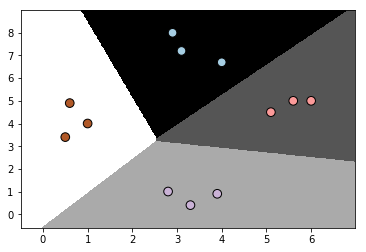

In [30]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    plt.show()
#샘플 입력 데이터 정의
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

#로지스틱 회귀분류기 생성
classifier = linear_model.LogisticRegression(solver='liblinear', C=100)
#분류기 학습
classifier.fit(X,y)

#분류기 성능 시각화
visualize_classifier(classifier,X,y)